# Feature Scaling using Standardization

In [1]:
# Importing the libraries
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Importing the dataset
dataset = sns.load_dataset('titanic')
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# here we will use four features to demonstrate the use of Standardization
datasettoworkon = dataset[['survived', 'pclass', 'age', 'parch']]
datasettoworkon.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [4]:
# As the data is not clean, we will fill the missing value with the mean of the column
datasettoworkon_new = datasettoworkon.fillna(datasettoworkon.mean())
datasettoworkon_new.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [5]:
X = datasettoworkon_new.drop('survived', axis=1)
y = datasettoworkon_new['survived']
X.shape, y.shape

((891, 3), (891,))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 3), (179, 3), (712,), (179,))

In [7]:
MinMaxScaler_object = MinMaxScaler()
MinMaxScaler_object.fit(X_train)

MinMaxScaler()

In [8]:
X_train_transformed = MinMaxScaler_object.transform(X_train)
X_test_transformed = MinMaxScaler_object.transform(X_test)

In [9]:
X_train_transformed

array([[1.        , 0.36592862, 0.33333333],
       [0.5       , 0.38232699, 0.        ],
       [0.5       , 0.38232699, 0.16666667],
       ...,
       [1.        , 0.36592862, 0.        ],
       [1.        , 0.44535485, 0.        ],
       [0.5       , 0.74788857, 0.16666667]])

In [10]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=['pclass', 'age', 'parch'])
X_test_transformed = pd.DataFrame(X_test_transformed, columns=['pclass', 'age', 'parch'])

In [11]:
X_train_transformed.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.66,0.37,0.07
std,0.42,0.17,0.14
min,0.00,0.00,0.00
25%,0.50,0.27,0.00
50%,1.00,0.37,0.00
75%,1.00,0.43,0.00
max,1.00,1.00,1.00


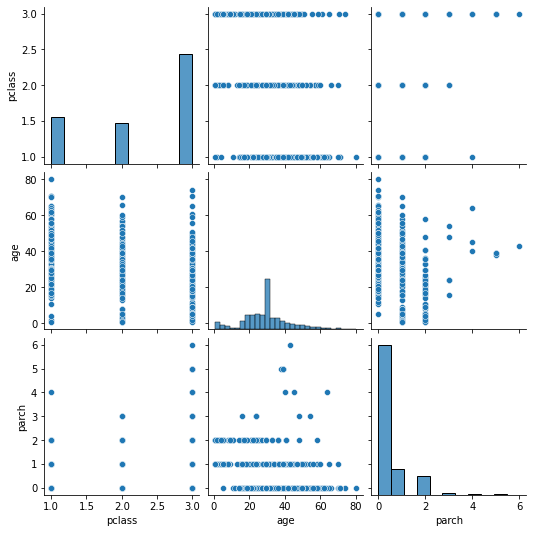

In [12]:
sns.pairplot(X_train)

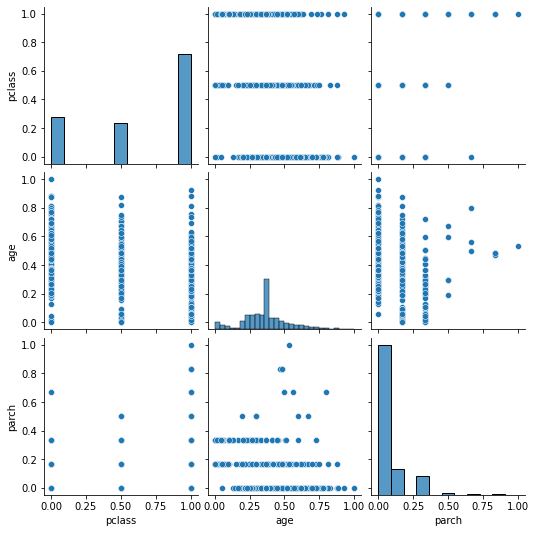

In [13]:
sns.pairplot(X_train_transformed)

### Prepared by RITURAJ RAMAN